## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**2 questions I chose: #3 and #6**

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

# 1.

In [2]:
# Load the cars_env.csv data
import pandas as pd

cars_df = pd.read_csv('cars_env.csv')
cars_df.head()

,veh id,manufacturer,nameplate,model,CVCM class,EPA class,fleet type,fuel type,footprint,baseline price,baseline mpg,baseline sales,predicted mpg
0,1,HONDA,Acura,MDX 4WD,11,SUV,T,G,50.8,45706.20000,22.052700,57380.0,23.011100
1,2,HONDA,Acura,RDX,11,SUV,T,G,45.1,34588.20000,24.174500,21271.0,26.457747
2,3,HONDA,Acura,RL,4,MIDSIZE CARS,C,G,47.6,47934.90000,24.562900,5132.0,23.773800
3,4,HONDA,Acura,TL,4,MIDSIZE CARS,C,G,47.8,35217.81622,27.068237,56720.0,26.884192
4,5,HONDA,Acura,TSX,3,COMPACT CARS,C,G,46.0,29483.10000,29.855173,21996.0,31.871653


In [3]:
# We're going to use footprint, baseline mpg, baseline price, and baseline sales.
# Prepare some EDA results for these variables

y = cars_df['baseline sales']
X = cars_df.loc[:, ['footprint','baseline mpg','baseline price'] ]

X = X.rename(columns = {'baseline mpg':'mpg','baseline price':'price'})
print(X.head())

   footprint        mpg        price
0       50.8  22.052700  45706.20000
1       45.1  24.174500  34588.20000
2       47.6  24.562900  47934.90000
3       47.8  27.068237  35217.81622
4       46.0  29.855173  29483.10000


# 2.

In [4]:
# Maxmin normalize footprint, mpg, and price.
# These will be our features/covariates  𝑋 . Our target/dependent/outcome variable  𝑦  will be sales. (done above)
# Does it make sense to normalize  𝑦 ?

def maxmin(z):
    u = (z-min(z))/(max(z)-min(z))
    return u
X = X.apply(maxmin)
X.describe()

# It does sense to normalize y since the range of y is significantly different from that of x, potentially leading to instability in training

,footprint,mpg,price
count,524.000000,524.000000,524.000000
mean,0.312090,0.235722,0.023150
std,0.193966,0.119604,0.052077
min,0.000000,0.000000,0.000000
25%,0.183982,0.152662,0.007797
50%,0.259029,0.219100,0.012050
75%,0.389783,0.292190,0.022760
max,1.000000,1.000000,1.000000


# 3.

In [5]:
# Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=300)

# 4.

[28]


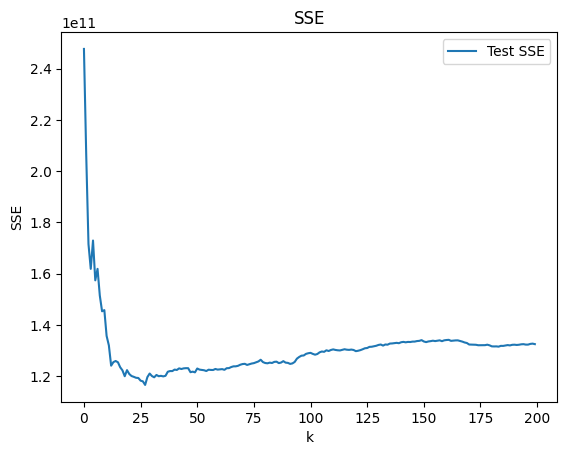

In [7]:
# Using all three covariates --- footprint, mpg, and price ---
# what's the best  𝑘  to use? What SSE is achieved on the test set? To answer these questions,
# evalute the sum of squared error on the test set for a reasonable range of values of  𝑘
# (perhaps 2 to 150), and find the  𝑘 with the lowest SSE
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Price, mpg, and footprint:
k_bar = 200
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
    y_hat = fitted_model.predict(X_train)
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# 5.

In [8]:
# Do part 4 again, for each pair of variables: footprint and mpg, footprint and price, mpg and price.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4,random_state=10000)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

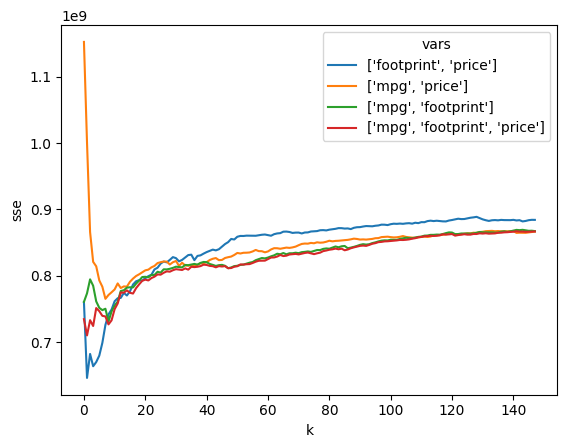

646214942.2865593
765307146.4872227
731167988.5937158
710205461.4358218


In [9]:
vars1 = ['footprint','price']
vars2 = ['mpg','price']
vars3 = ['mpg','footprint']
vars4 = ['mpg','footprint', 'price']

kgrid = np.arange(2,150)
N = len(y)

SSE_results = []
y_hat_results = []
for var_list in [vars1, vars2, vars3,vars4]:
    X_train_1 = X_train.loc[:,var_list ]
    X_test_1 = X_test.loc[:,var_list]
    SSE = np.zeros(len(kgrid))
    for k in range(len(kgrid)):
        model = KNeighborsRegressor(n_neighbors=kgrid[k])
        fitted_model = model.fit(X_train_1,y_train)
        y_hat = fitted_model.predict(X_test_1)
        y_hat_results.append(y_hat)
        SSE_results.append( {'sse':np.sum( (y_test-y_hat)**2)/N,
                            'vars':str(var_list),
                            'k':k} )
gdf = pd.DataFrame.from_dict(SSE_results)

sns.lineplot(y='sse',x='k',data=gdf,hue='vars')
plt.show()

print( np.min( gdf.loc[gdf['vars'] == str(vars1),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars2),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars3),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars4),'sse']))

# 6.

In [10]:
# Which set of variables from parts 4 and 5 does the best, in terms of
# minimizing SSE at the optimal choice of neighbors? Explain.

# Footprint and price appear to be the best at prediciting consumer behavior (sales)
# since these variables minimize and have the lowest sse

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

# 1.

In [11]:
# Load airbnb_hw.csv with Pandas
import pandas as pd
airbnb_df = pd.read_csv('airbnb_hw.csv')
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [12]:
# Use .loc to reduce the dataframe to these variables: Review Scores Rating, Price, and Beds
airbnb_df = airbnb_df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
airbnb_df.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


# 2.

In [13]:
# Set use .isnull() to select the subset of the dataframe with missing review values.
# Set those aside in a different dataframe.
airbnb_df_missing = airbnb_df[airbnb_df['Review Scores Rating'].isnull()]
airbnb_df_missing.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
13,NaN,68,1.0


# 3.

In [14]:
# Use df = df.dropna(axis = 0, how = 'any') to eliminate any observations with missing values/NA's from the dataframe.
airbnb_df = airbnb_df.dropna(axis = 0, how = 'any')
airbnb_df.head()

,Review Scores Rating,Price,Beds
4,96.0,549,3.0
5,100.0,149,1.0
6,100.0,250,1.0
7,94.0,90,1.0
8,90.0,270,2.0


# 4.

[137]


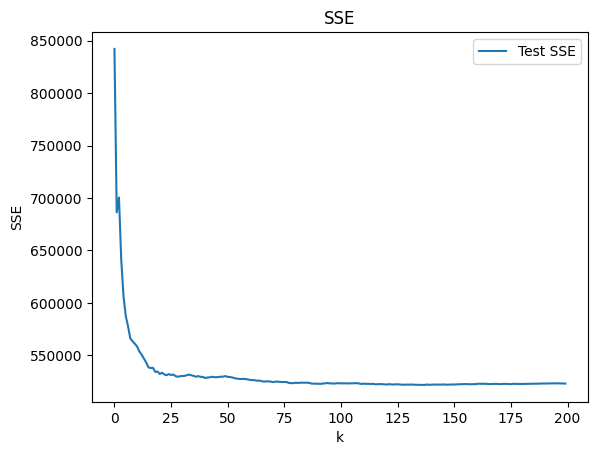

In [15]:
# For the complete cases, create a  𝑘 -NN model that uses the variables Price and Beds to predict Review Scores Rating.
# How do you choose  𝑘 ?
 # (Hint: Train/test split, iterate over reasonable values of  𝑘  and find a value
 # that minimizes SSE on the test split using predictions from the training set.)

# Clean the data
airbnb_df['Price'] = airbnb_df['Price'].replace('[\$,]', '', regex=True).astype(float)
airbnb_df['Beds'] = airbnb_df['Beds'].replace(',', '', regex=True).astype(float)
airbnb_df = airbnb_df.dropna(subset=['Price', 'Beds', 'Review Scores Rating'])


y = airbnb_df['Review Scores Rating']
X = airbnb_df.loc[:, ['Price', 'Beds']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

k_bar = 200
SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test - y_hat) ** 2)

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = min_index[0] + 1
print(k_star)

plt.plot(np.arange(0, k_bar), SSE, label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# Fit optimal model:
model = KNeighborsRegressor(n_neighbors=k_star[0])
fitted_model = model.fit(X_train, y_train)

# 5.

In [16]:
# Predict the missing ratings.
x_impute = airbnb_df.loc[:, ['Price', 'Beds']].dropna(axis=0, how='any')
y_impute = fitted_model.predict(x_impute)

# 6.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


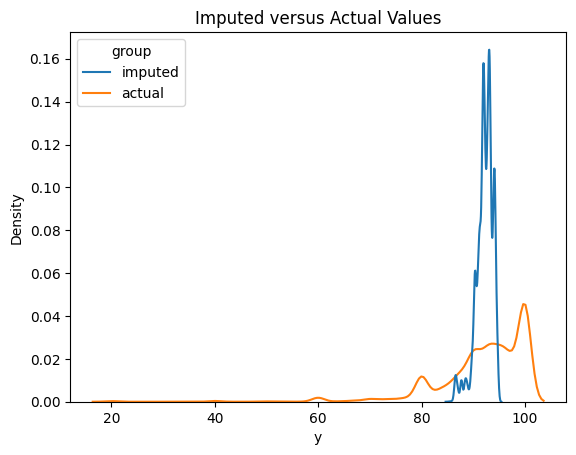

In [17]:
# Do a kernel density plot of the training ratings and the predicted missing ratings.
# Do they look similar or not? Explain why.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for imputed values
imputed = pd.DataFrame({'y': y_impute, 'group': 'imputed'})
# Create a DataFrame for the actual review scores
true = pd.DataFrame({'y': airbnb_df['Review Scores Rating'], 'group': 'actual'})
# Concatenate the two DataFrames
gdf = pd.concat([imputed, true], axis=0)

# Plot the kernel density estimate for imputed vs. actual values
sns.kdeplot(x='y', hue='group', data=gdf)
plt.title('Imputed versus Actual Values')
plt.show()

# The imputed values are much more compressed than the real ones.